# Japnees used car pridiction

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Linear regression, Random Forest, SVR, KNN

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
df.tail()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline
2317,2335,1400,toyota,estima t,2005,72320,3000,at,2wd,rhd,gasoline


In [5]:
df.shape

(2318, 11)

The data has 2318 instances with 11 attributes - 5 integer type and 6 object type as evident from the above result. Above o/p shows that the dataset consists of 6 categorical and 5 continuous variables.
Check for the Missing Values
There is always a necessity to check the presence of Null Values in dataset as that may lead us to inefficiency or errors in evaluation.
Column 'id' needs to be deleted as it cannot be used in analysis.

In [6]:
df.isnull().sum()
print("There are", df.isnull().values.sum(),"Missing Values in dataset")

There are 0 Missing Values in dataset


In [7]:
df.drop('id',axis=1,inplace=True)
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...
2313,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


# We will find unique values in categorical data

In [8]:
for column in df.columns: 
    if df[column].dtype == 'object': 
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts())
        print('\n')

MARK :  28
toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64


MODEL :  258
fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int

In [9]:
#Checking for Duplicates

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,2318.0,NaN,NaN,NaN,971.522433,288.673112,80.0,776.0,1000.0,1213.0,1400.0
mark,2318,28,toyota,1047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,2318,258,fit,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,2318.0,NaN,NaN,NaN,2005.97239,3.698863,1979.0,2004.0,2006.0,2009.0,2015.0
mileage,2318.0,NaN,NaN,NaN,100013.194996,52512.478883,2000.0,67000.0,94000.0,124000.0,790000.0
engine_capacity,2318.0,NaN,NaN,NaN,1507.010785,549.58517,9.0,1300.0,1490.0,1800.0,12340.0
transmission,2318,3,at,2171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,2318,3,2wd,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hand_drive,2318,3,rhd,2301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,2318,5,gasoline,2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.
Find the Outliers for continuous variables.

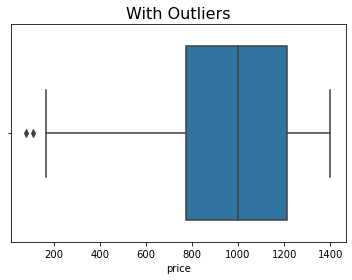

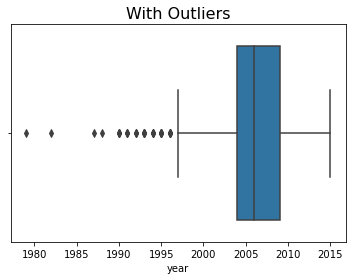

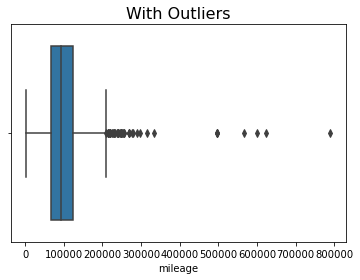

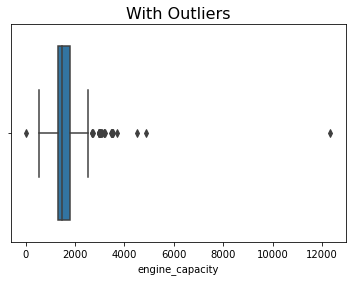

In [12]:
cols=['price','year','mileage','engine_capacity'];

for i in cols:
    sns.boxplot(df[i])
    plt.title('With Outliers',fontsize=16)
    plt.show()

In [13]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3 - q1
((df<(q1 -(1.5 * iqr)))|(df>(q3 +(1.5 * iqr)))).sum()

drive               0
engine_capacity    44
fuel                0
hand_drive          0
mark                0
mileage            46
model               0
price               2
transmission        0
year               35
dtype: int64

There are outliers in the dataset in 'price', 'year', 'mileage', 'engine_capacity'.
There are three common approaches for converting ordinal and categorical variables to numerical values.
They are:
• Ordinal Encoding
• One-Hot Encoding
• Dummy Variable Encoding
We know that six categorical variables are present in dataset. Convert categorical to dummy variables as Categorical values cannot be given in the regression models. Hence, we will encode categorical values to an integer by converting categorical to dummy variables.

In [14]:
df.select_dtypes(include='object').head(10)

,mark,model,transmission,drive,hand_drive,fuel
0,nissan,march,at,2wd,rhd,gasoline
1,nissan,march,at,2wd,rhd,gasoline
2,nissan,lafesta,at,2wd,rhd,gasoline
3,toyota,avensis,at,2wd,rhd,gasoline
4,daihatsu,mira,at,2wd,rhd,gasoline
5,daihatsu,mira,at,2wd,rhd,gasoline
6,nissan,march,at,2wd,rhd,gasoline
7,volkswagen,passat,at,4wd,rhd,gasoline
8,mazda,bongo van,mt,2wd,rhd,gasoline
9,honda,step wgn,at,2wd,rhd,gasoline


In [15]:
df2_dummy = pd.get_dummies(df, columns=['mark','model','transmission','drive','hand_drive','fuel'],drop_first=True)
df2_dummy.head()

,price,year,mileage,engine_capacity,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,80,2003,80000,1240,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,110,2010,53000,1200,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,165,2005,47690,2000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,190,2008,130661,1990,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,190,2006,66300,660,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


Removal of the Outliers for continuous variables.

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in df2_dummy.columns:
    lr,ur=remove_outlier(df2_dummy[column])
    df2_dummy[column]=np.where(df2_dummy[column]>ur,ur,df2_dummy[column])
    df2_dummy[column]=np.where(df2_dummy[column]<lr,lr,df2_dummy[column])

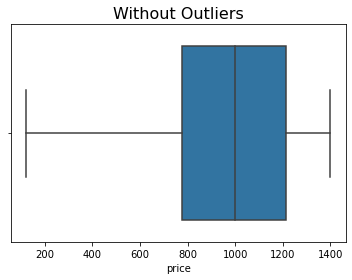

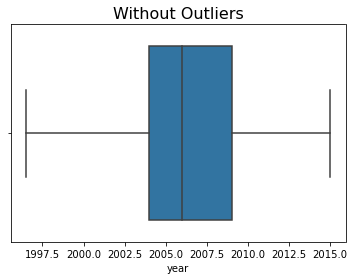

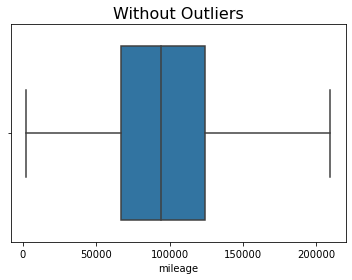

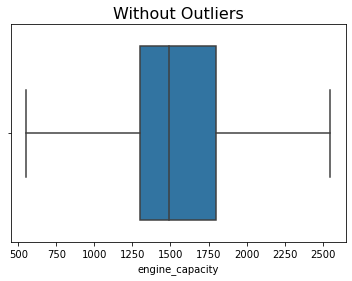

In [18]:
cols=['price','year','mileage','engine_capacity'];

for i in cols:
    sns.boxplot(df2_dummy[i])
    plt.title('Without Outliers',fontsize=16)
    plt.show()

# Univariate Analysis
Let us define a function 'UnivariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.
The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary.

In [19]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()


In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

4

Description of price
----------------------------------------------------------------------------
count    2318.000000
mean      971.522433
std       288.673112
min        80.000000
25%       776.000000
50%      1000.000000
75%      1213.000000
max      1400.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


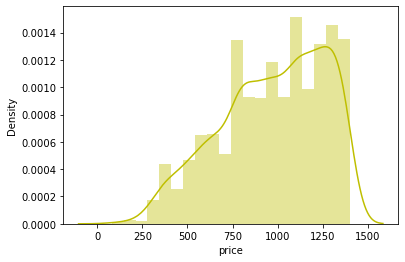

BoxPlot of price
----------------------------------------------------------------------------


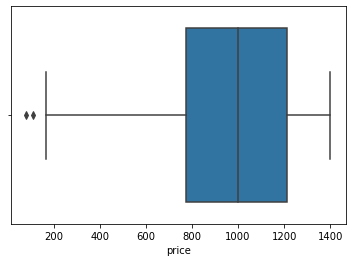

Description of year
----------------------------------------------------------------------------
count    2318.000000
mean     2005.972390
std         3.698863
min      1979.000000
25%      2004.000000
50%      2006.000000
75%      2009.000000
max      2015.000000
Name: year, dtype: float64 Distribution of year
----------------------------------------------------------------------------


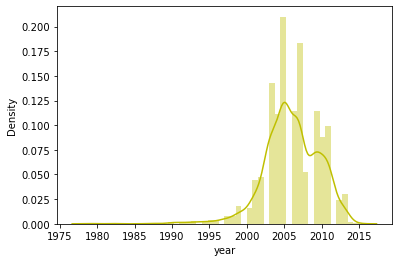

BoxPlot of year
----------------------------------------------------------------------------


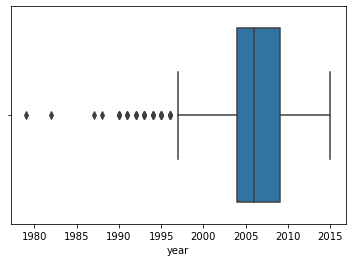

Description of mileage
----------------------------------------------------------------------------
count      2318.000000
mean     100013.194996
std       52512.478883
min        2000.000000
25%       67000.000000
50%       94000.000000
75%      124000.000000
max      790000.000000
Name: mileage, dtype: float64 Distribution of mileage
----------------------------------------------------------------------------


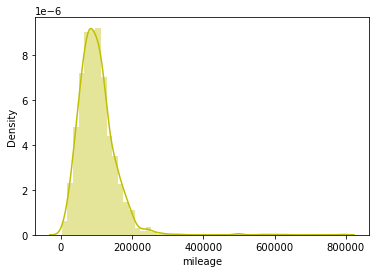

BoxPlot of mileage
----------------------------------------------------------------------------


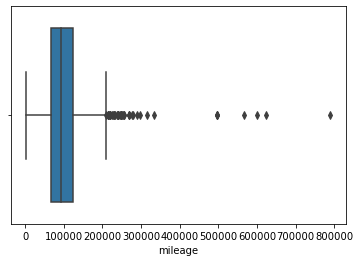

Description of engine_capacity
----------------------------------------------------------------------------
count     2318.000000
mean      1507.010785
std        549.585170
min          9.000000
25%       1300.000000
50%       1490.000000
75%       1800.000000
max      12340.000000
Name: engine_capacity, dtype: float64 Distribution of engine_capacity
----------------------------------------------------------------------------


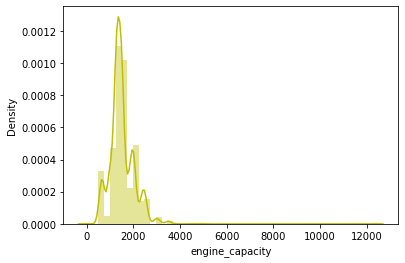

BoxPlot of engine_capacity
----------------------------------------------------------------------------


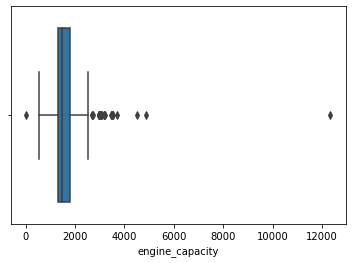

In [21]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [22]:
df_num.skew()

price             -0.466780
year              -0.845917
mileage            3.089142
engine_capacity    4.038892
dtype: float64

Distribution is skewed to left tail for the variables Price and Year and for variables Mileage and Engine_Capacity it is right tail

# Bivariate Analysis

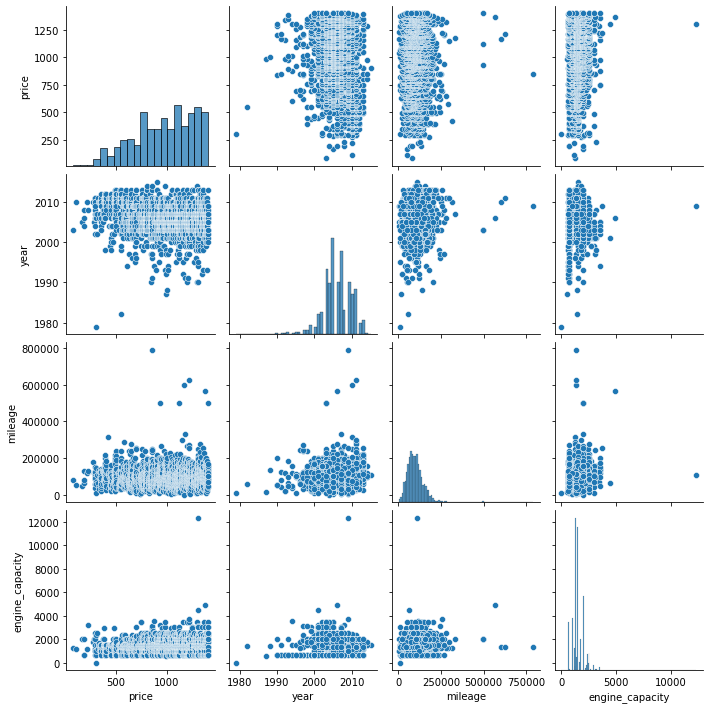

In [23]:
sns.pairplot(df)
plt.show()


# Find the Correlation between variables

In [24]:
df.corr()

,price,year,mileage,engine_capacity
price,1.000000,-0.211092,0.021581,0.173748
year,-0.211092,1.000000,0.086065,-0.142460
mileage,0.021581,0.086065,1.000000,0.130362
engine_capacity,0.173748,-0.142460,0.130362,1.000000


# Correlation Heatmap

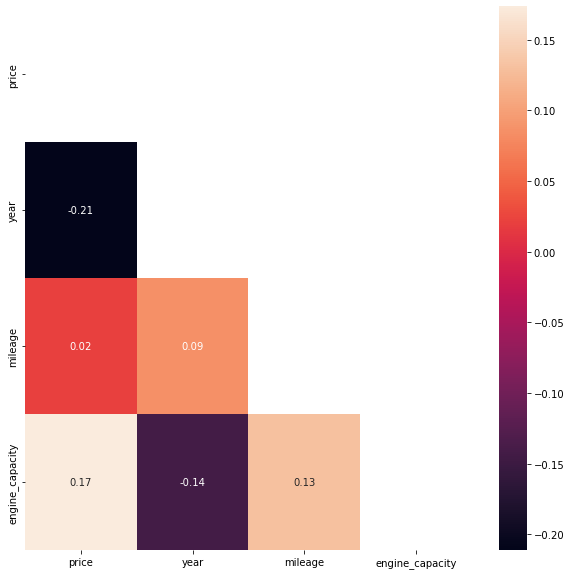

In [25]:
corrl = df.corr(method='pearson')
mask1 = np.triu(np.ones_like(corrl, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask1)
plt.show()

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [26]:
df3 = df2_dummy.copy()

In [27]:
df3.head()

,price,year,mileage,engine_capacity,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,...,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_lhd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,120.5,2003.0,80000.0,1240.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,120.5,2010.0,53000.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,165.0,2005.0,47690.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,190.0,2008.0,130661.0,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,190.0,2006.0,66300.0,660.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Data Split: Split the data into train and test (70:30)

Before Splitting we need to find the Target Variable and here we have target variable is "Price"

In [34]:
X = df3.drop('price', axis=1)
Y = df3[['price']]

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [36]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1622, 297)
Number of rows and columns of the training set for the dependent variable: (1622, 1)
Number of rows and columns of the test set for the independent variables: (696, 297)
Number of rows and columns of the test set for the dependent variable: (696, 1)


1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

As discussed earlier Scaling of the data is not required for LDA whereas for Logistic Regression we need to scale the data. So we will first build LDA model and then Logistic Regression model.

In [44]:
scalar=StandardScaler()

In [45]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)


In [46]:
model=LinearRegression()

In [47]:
model.fit(X_train, Y_train)

LinearRegression()

In [48]:
pred=model.predict(X_test)


In [49]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
print("MAE", (metrics.mean_absolute_error(pred, Y_test)))
print("MSE", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score",(metrics.r2_score(pred, Y_test)))

MAE 225.56227357721863
MSE 72663.98326632979
R2 score -8.968150876370492


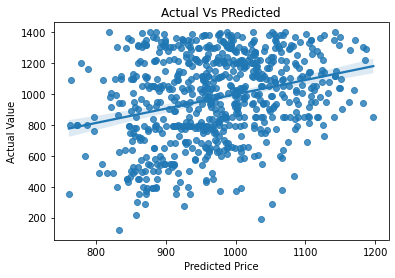

In [51]:
sns.regplot(x=pred, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Value")
plt.title("Actual Vs PRedicted")
plt.show()

# Decision Tree

In [54]:
dt=DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_pred=dt.predict(X_test)

In [55]:
dt_mae=mean_absolute_error(Y_test, dt_pred)
dt_mse=mean_squared_error(Y_test, dt_pred)
dt_r2=r2_score(Y_test, dt_pred)

print("MAE", dt_mae)
print("mse", dt_mse)
print("r2", dt_r2)

MAE 274.4238505747126
mse 120624.86709770115
r2 -0.5291019297609572


# Random Forest

In [56]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
rf_pred=rf.predict(X_test)

In [57]:
rf_mae=mean_absolute_error(Y_test, rf_pred)
rf_mse=mean_squared_error(Y_test, rf_pred)
rf_r2=r2_score(Y_test, rf_pred)

print("MAE", rf_mae)
print("mse", rf_mse)
print("r2",rf_r2)

MAE 218.68227808565953
mse 73872.40049623503
r2 0.06355602395503057
